# Import Library And DataSet

In [155]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [156]:
df=pd.read_csv('loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data Information

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Checking the null values

In [158]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

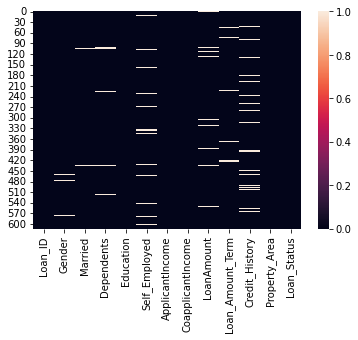

In [159]:
sns.heatmap(df.isnull())

# Filling Null Values

In [160]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


In [161]:
df['Loan_Amount_Term'].value_counts()


360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [162]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)


In [163]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)


In [164]:
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [165]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data Visualization

In [166]:
df['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

In [167]:
# Normalize can be set to True to print proportions instead of number 
df['Loan_Status'].value_counts(normalize=True)


Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

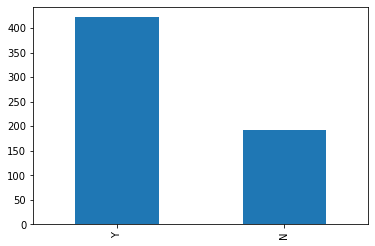

In [168]:
df['Loan_Status'].value_counts().plot.bar()


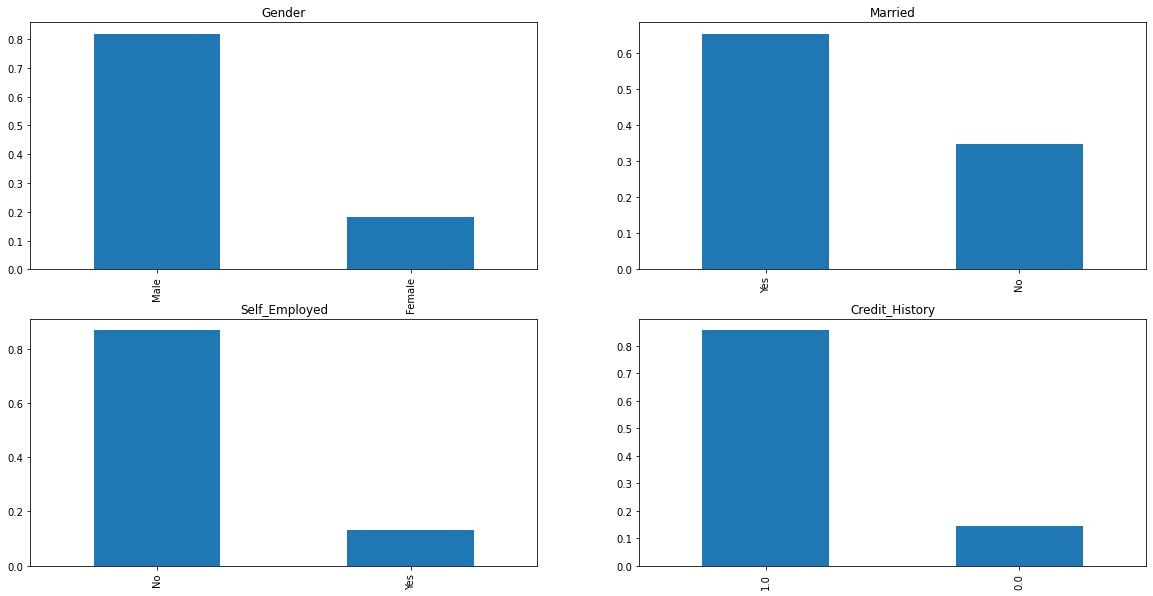

In [169]:
plt.figure(1)
plt.subplot(221)
df['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

plt.subplot(224)
df['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.show()


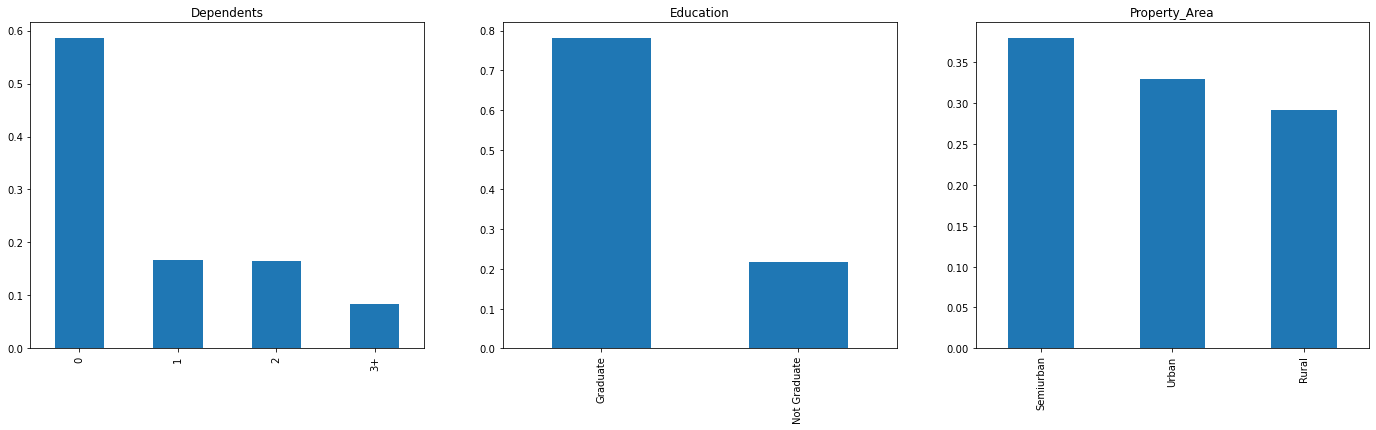

In [170]:
plt.figure(1)
plt.subplot(131)
df['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

plt.subplot(132)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(133)
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()


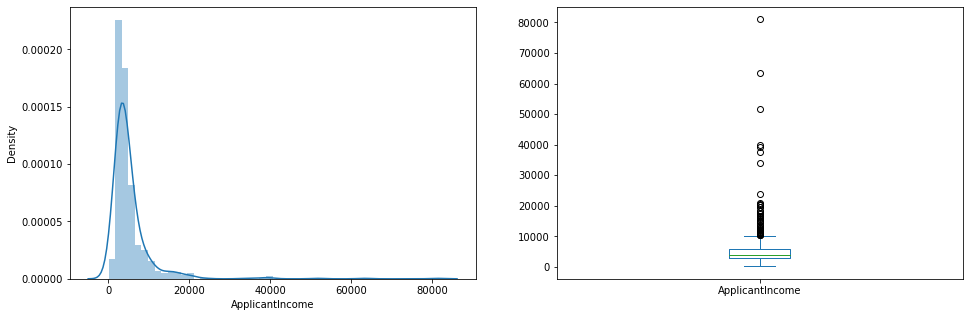

In [171]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['ApplicantIncome']);

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()


Text(0.5, 0.98, '')

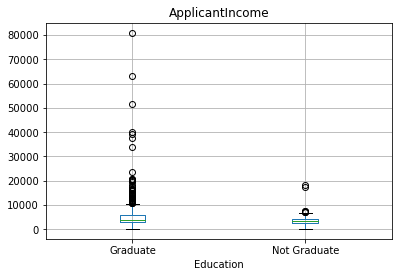

In [172]:
df.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")


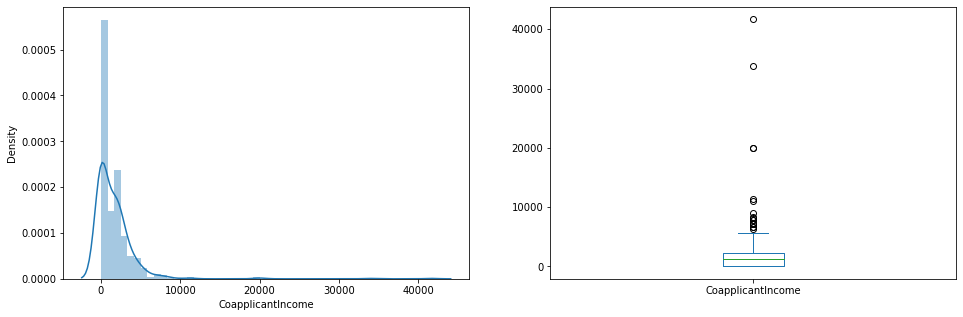

In [173]:
plt.figure(1)
plt.subplot(121)
sns.distplot(df['CoapplicantIncome']);

plt.subplot(122)
df['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()


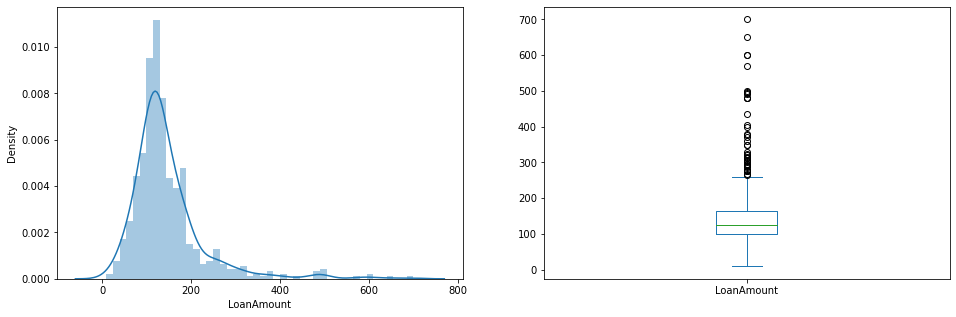

In [174]:
plt.figure(1)
plt.subplot(121)
df=df.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))

plt.show()


<AxesSubplot:xlabel='Gender'>

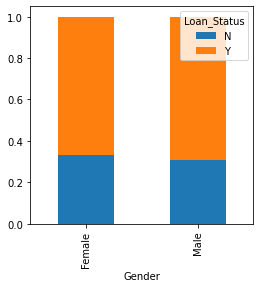

In [175]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))


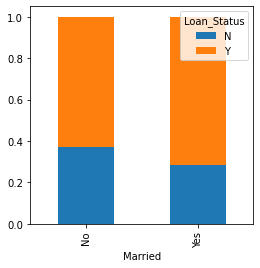

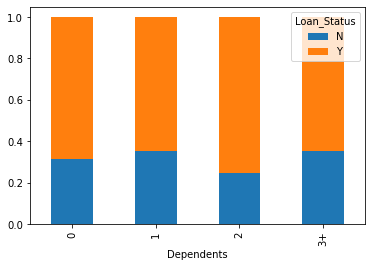

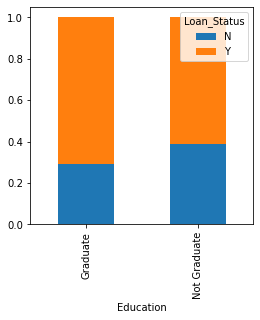

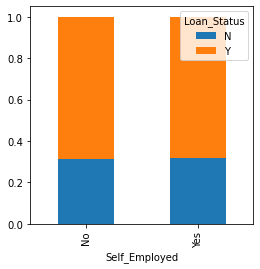

In [176]:
Married=pd.crosstab(df['Married'],df['Loan_Status'])
Dependents=pd.crosstab(df['Dependents'],df['Loan_Status'])
Education=pd.crosstab(df['Education'],df['Loan_Status'])
Self_Employed=pd.crosstab(df['Self_Employed'],df['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()


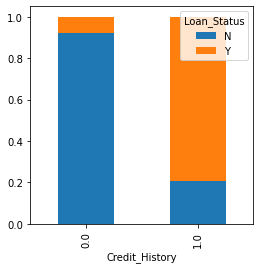

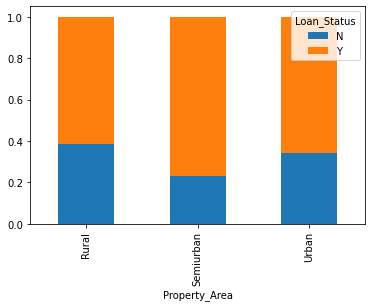

In [177]:
Credit_History=pd.crosstab(df['Credit_History'],df['Loan_Status'])
Property_Area=pd.crosstab(df['Property_Area'],df['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()


<AxesSubplot:xlabel='Loan_Status'>

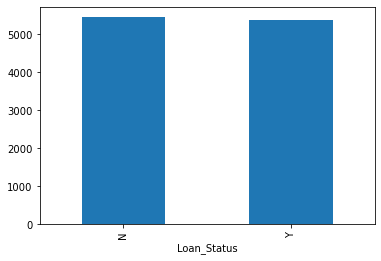

In [178]:
df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()


In [179]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
df['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)


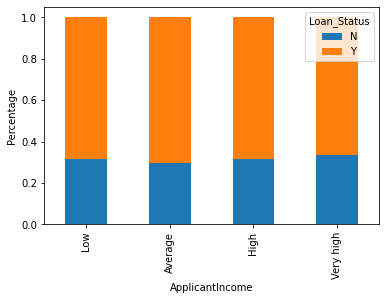

In [180]:
Income_bin=pd.crosstab(df['Income_bin'],df['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')


In [181]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
df['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)


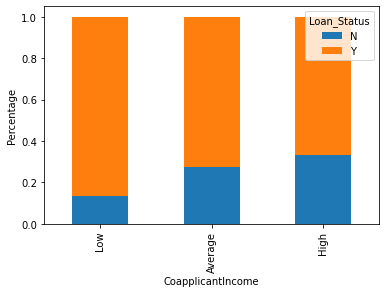

In [182]:
Coapplicant_Income_bin=pd.crosstab(df['Coapplicant_Income_bin'],df['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')


In [183]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']


In [184]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
df['Total_Income_bin']=pd.cut(df['Total_Income'],bins,labels=group)


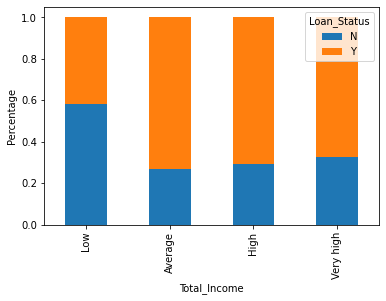

In [185]:
Total_Income_bin=pd.crosstab(df['Total_Income_bin'],df['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')


In [186]:
bins=[0,100,200,700]
group=['Low','Average','High']
df['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)


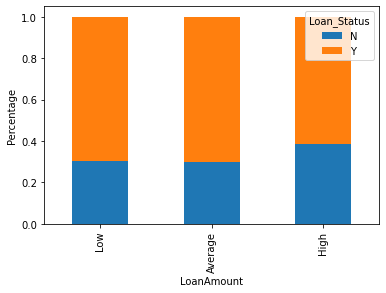

In [187]:
LoanAmount_bin=pd.crosstab(df['LoanAmount_bin'],df['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')


In [188]:
df=df.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)


In [189]:
df['Dependents'].replace('3+', 3,inplace=True)
df['Dependents'].replace('3+', 3,inplace=True)
df['Loan_Status'].replace('N', 0,inplace=True)
df['Loan_Status'].replace('Y', 1,inplace=True)


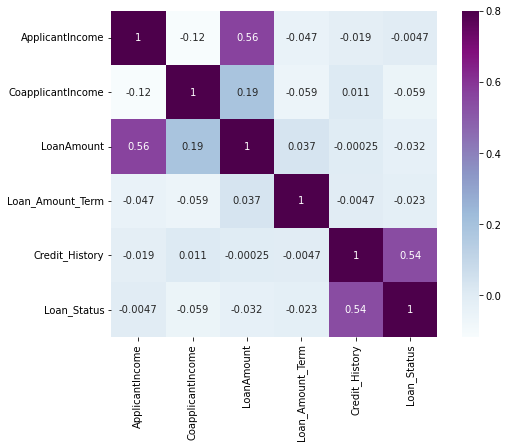

In [190]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True,annot=True, cmap="BuPu");


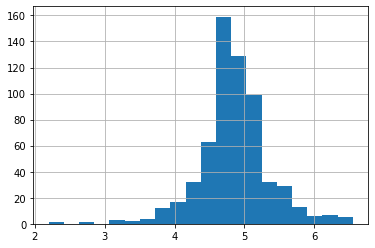

In [191]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)
df['LoanAmount_log'] = np.log(df['LoanAmount'])


# Separating Data X and Y

In [192]:
df=df.drop('Loan_ID',axis=1)

In [194]:
X = df.drop('Loan_Status',1)
y = df.Loan_Status


In [196]:
X=pd.get_dummies(X)
df=pd.get_dummies(df)


In [197]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3)


In [198]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [199]:
pred_test = model.predict(x_test)


In [202]:
print("Accuracy Score",accuracy_score(y_test,pred_test))
print("Confusion Matrix",confusion_matrix(y_test,pred_test))
print('Classification Report',classification_report(y_test,pred_test))


Accuracy Score 0.7945945945945946
Confusion Matrix [[ 19  34]
 [  4 128]]
Classification Report               precision    recall  f1-score   support

           0       0.83      0.36      0.50        53
           1       0.79      0.97      0.87       132

    accuracy                           0.79       185
   macro avg       0.81      0.66      0.69       185
weighted avg       0.80      0.79      0.76       185



# MultinomialNB


In [203]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print("Accuracy Score",accuracy_score(y_test,predmnb))
print("Confusion Matrix",confusion_matrix(y_test,predmnb))
print('Classification Report',classification_report(y_test,predmnb))

Accuracy Score 0.5027027027027027
Confusion Matrix [[21 32]
 [60 72]]
Classification Report               precision    recall  f1-score   support

           0       0.26      0.40      0.31        53
           1       0.69      0.55      0.61       132

    accuracy                           0.50       185
   macro avg       0.48      0.47      0.46       185
weighted avg       0.57      0.50      0.53       185



# KNeighbours Classifier


In [204]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy Score",accuracy_score(y_test,predknn))
print("Confusion Matrix",confusion_matrix(y_test,predknn))
print('Classification Report',classification_report(y_test,predknn))

Accuracy Score 0.6054054054054054
Confusion Matrix [[13 40]
 [33 99]]
Classification Report               precision    recall  f1-score   support

           0       0.28      0.25      0.26        53
           1       0.71      0.75      0.73       132

    accuracy                           0.61       185
   macro avg       0.50      0.50      0.50       185
weighted avg       0.59      0.61      0.60       185



In [205]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
print(svc.score(x_train,y_train))
predsvc=svc.predict(x_test)
print("Accuracy Score",accuracy_score(y_test,predsvc))
print("Confusion Matrix",confusion_matrix(y_test,predsvc))
print('Classification Report',classification_report(y_test,predsvc))

0.682983682983683
Accuracy Score 0.7081081081081081
Confusion Matrix [[  0  53]
 [  1 131]]
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.71      0.99      0.83       132

    accuracy                           0.71       185
   macro avg       0.36      0.50      0.41       185
weighted avg       0.51      0.71      0.59       185



In [206]:
svc1=SVC(kernel='poly')
svc1.fit(x_train,y_train)
print(svc1.score(x_train,y_train))
predsvc1=svc1.predict(x_test)
print("Accuracy Score",accuracy_score(y_test,predsvc1))
print("Confusion Matrix",confusion_matrix(y_test,predsvc1))
print('Classification Report',classification_report(y_test,predsvc1))

0.682983682983683
Accuracy Score 0.7081081081081081
Confusion Matrix [[  0  53]
 [  1 131]]
Classification Report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.71      0.99      0.83       132

    accuracy                           0.71       185
   macro avg       0.36      0.50      0.41       185
weighted avg       0.51      0.71      0.59       185



In [207]:
svc2=SVC(kernel='linear')
svc2.fit(x_train,y_train)
print(svc2.score(x_train,y_train))
predsvc2=svc2.predict(x_test)
print("Accuracy Score",accuracy_score(y_test,predsvc2))
print("Confusion Matrix",confusion_matrix(y_test,predsvc2))
print('Classification Report',classification_report(y_test,predsvc2))

0.8135198135198135
Accuracy Score 0.7945945945945946
Confusion Matrix [[ 17  36]
 [  2 130]]
Classification Report               precision    recall  f1-score   support

           0       0.89      0.32      0.47        53
           1       0.78      0.98      0.87       132

    accuracy                           0.79       185
   macro avg       0.84      0.65      0.67       185
weighted avg       0.82      0.79      0.76       185



In [208]:
from sklearn.tree import DecisionTreeClassifier

In [209]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
print(dtc.score(x_train,y_train))
preddtc=dtc.predict(x_test)
print("Accuracy Score",accuracy_score(y_test,preddtc))
print("Confusion Matrix",confusion_matrix(y_test,preddtc))
print('Classification Report',classification_report(y_test,preddtc))

1.0
Accuracy Score 0.6432432432432432
Confusion Matrix [[27 26]
 [40 92]]
Classification Report               precision    recall  f1-score   support

           0       0.40      0.51      0.45        53
           1       0.78      0.70      0.74       132

    accuracy                           0.64       185
   macro avg       0.59      0.60      0.59       185
weighted avg       0.67      0.64      0.65       185



In [210]:
dtc1=DecisionTreeClassifier(criterion='entropy')
dtc1.fit(x_train,y_train)
print(dtc1.score(x_train,y_train))
preddtc1=dtc1.predict(x_test)
print("Accuracy Score",accuracy_score(y_test,preddtc1))
print("Confusion Matrix",confusion_matrix(y_test,preddtc1))
print('Classification Report',classification_report(y_test,preddtc1))

1.0
Accuracy Score 0.6270270270270271
Confusion Matrix [[23 30]
 [39 93]]
Classification Report               precision    recall  f1-score   support

           0       0.37      0.43      0.40        53
           1       0.76      0.70      0.73       132

    accuracy                           0.63       185
   macro avg       0.56      0.57      0.56       185
weighted avg       0.65      0.63      0.64       185



# Save The Model

In [212]:
import pickle

filename='Loan.pkl'
pickle.dump(svc2,open(filename,'wb'))
